In [10]:
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 
import numpy as np

In [11]:
Infy = pd.read_csv('Infy.csv')
Infy

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,522.25000,515.00000,518.84998,516.77502,5431340.00000,455.43054
1,2018-01-02,521.00000,511.50000,518.62500,514.84998,6112248.00000,453.73401
2,2018-01-03,515.79999,509.29999,514.25000,510.64999,6846552.00000,450.03259
3,2018-01-04,510.50000,504.79999,510.50000,507.70001,8947614.00000,447.43283
4,2018-01-05,513.20001,503.00000,507.64999,506.00000,11025976.00000,445.93463
...,...,...,...,...,...,...,...
1203,2022-11-16,1609.00000,1593.50000,1597.15002,1602.80005,4497697.00000,1602.80005
1204,2022-11-17,1602.80005,1582.94995,1597.19995,1587.40002,3469515.00000,1587.40002
1205,2022-11-18,1598.00000,1575.50000,1591.69995,1593.40002,3126064.00000,1593.40002
1206,2022-11-21,1587.84998,1564.05005,1582.09998,1568.19995,3071764.00000,1568.19995


In [12]:
Infy.loc[1200]

Date           2022-11-11
High           1573.50000
Low            1546.65002
Open           1546.65002
Close          1570.09998
Volume      7214098.00000
Adj Close      1570.09998
Name: 1200, dtype: object

In [13]:
# BoP يقيس ضغط البيع والشراء
# أدنى من خط الصفر بيع ,أعلى من خط الصفر شراء
Infy['BoP'] = ta.BOP(Infy['Open'], Infy['High'], Infy['Low'],Infy['Close'])
Infy['BoP_MA'] = ta.SMA(Infy['BoP'],9)

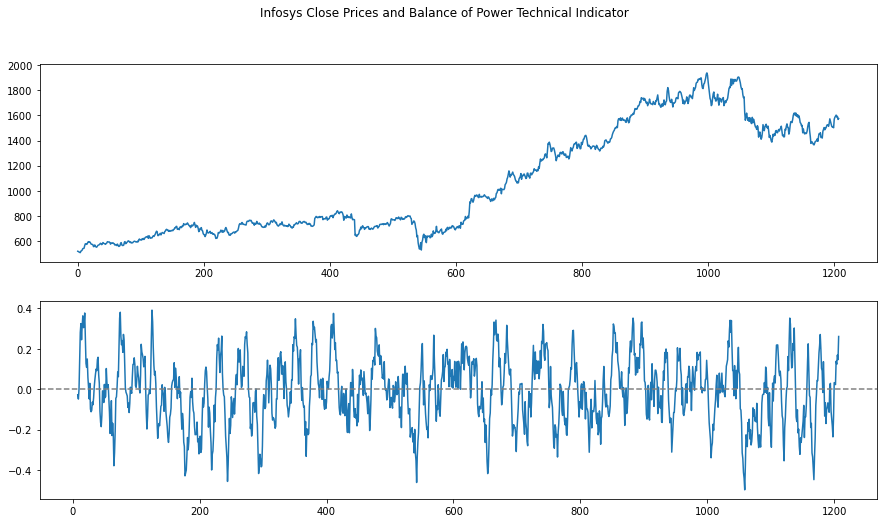

In [14]:
fig1, ax = plt.subplots(2, figsize=(15,8))
ax[0].plot(Infy['Close'])
ax[1].plot(Infy['BoP_MA'])
plt.axhline(0, color='gray', linestyle='--')
plt.suptitle('Infosys Close Prices and Balance of Power Technical Indicator')
plt.show()

In [15]:
pd.options.display.float_format = '{:.5f}'.format

In [16]:
# ADOSC مؤشر فني حجمي 
Infy['C_A/D_Osc'] = ta.ADOSC(Infy['High'], Infy['Low'],Infy['Close'], 
Infy['Volume'], fastperiod=6, slowperiod=20)

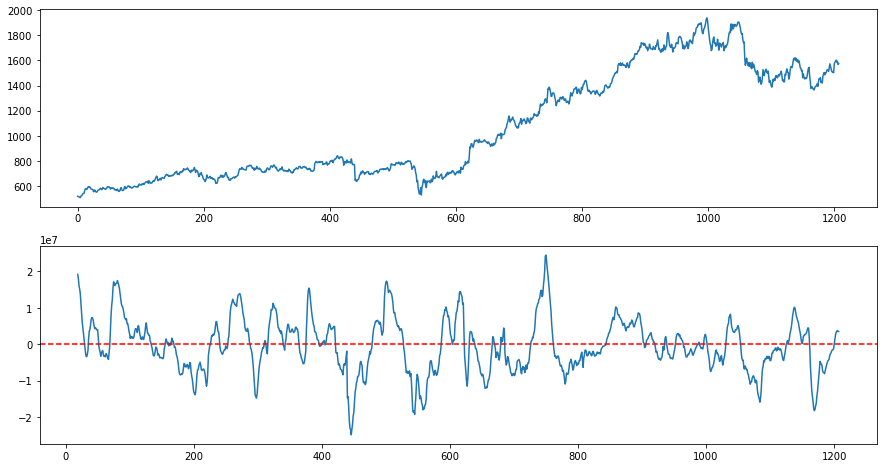

In [17]:
# التحرك الشديد الى السلبية يدل على أن ضغط البيع يسود، التحرك الشديد الإيجاب يدل على أن ضغط الشراء يسود 
fig1, ax = plt.subplots(2, figsize=(15,8))

ax[0].plot(Infy['Close'])
ax[1].plot(Infy['C_A/D_Osc'])
plt.axhline(0, color='red', linestyle='--')
plt.show()